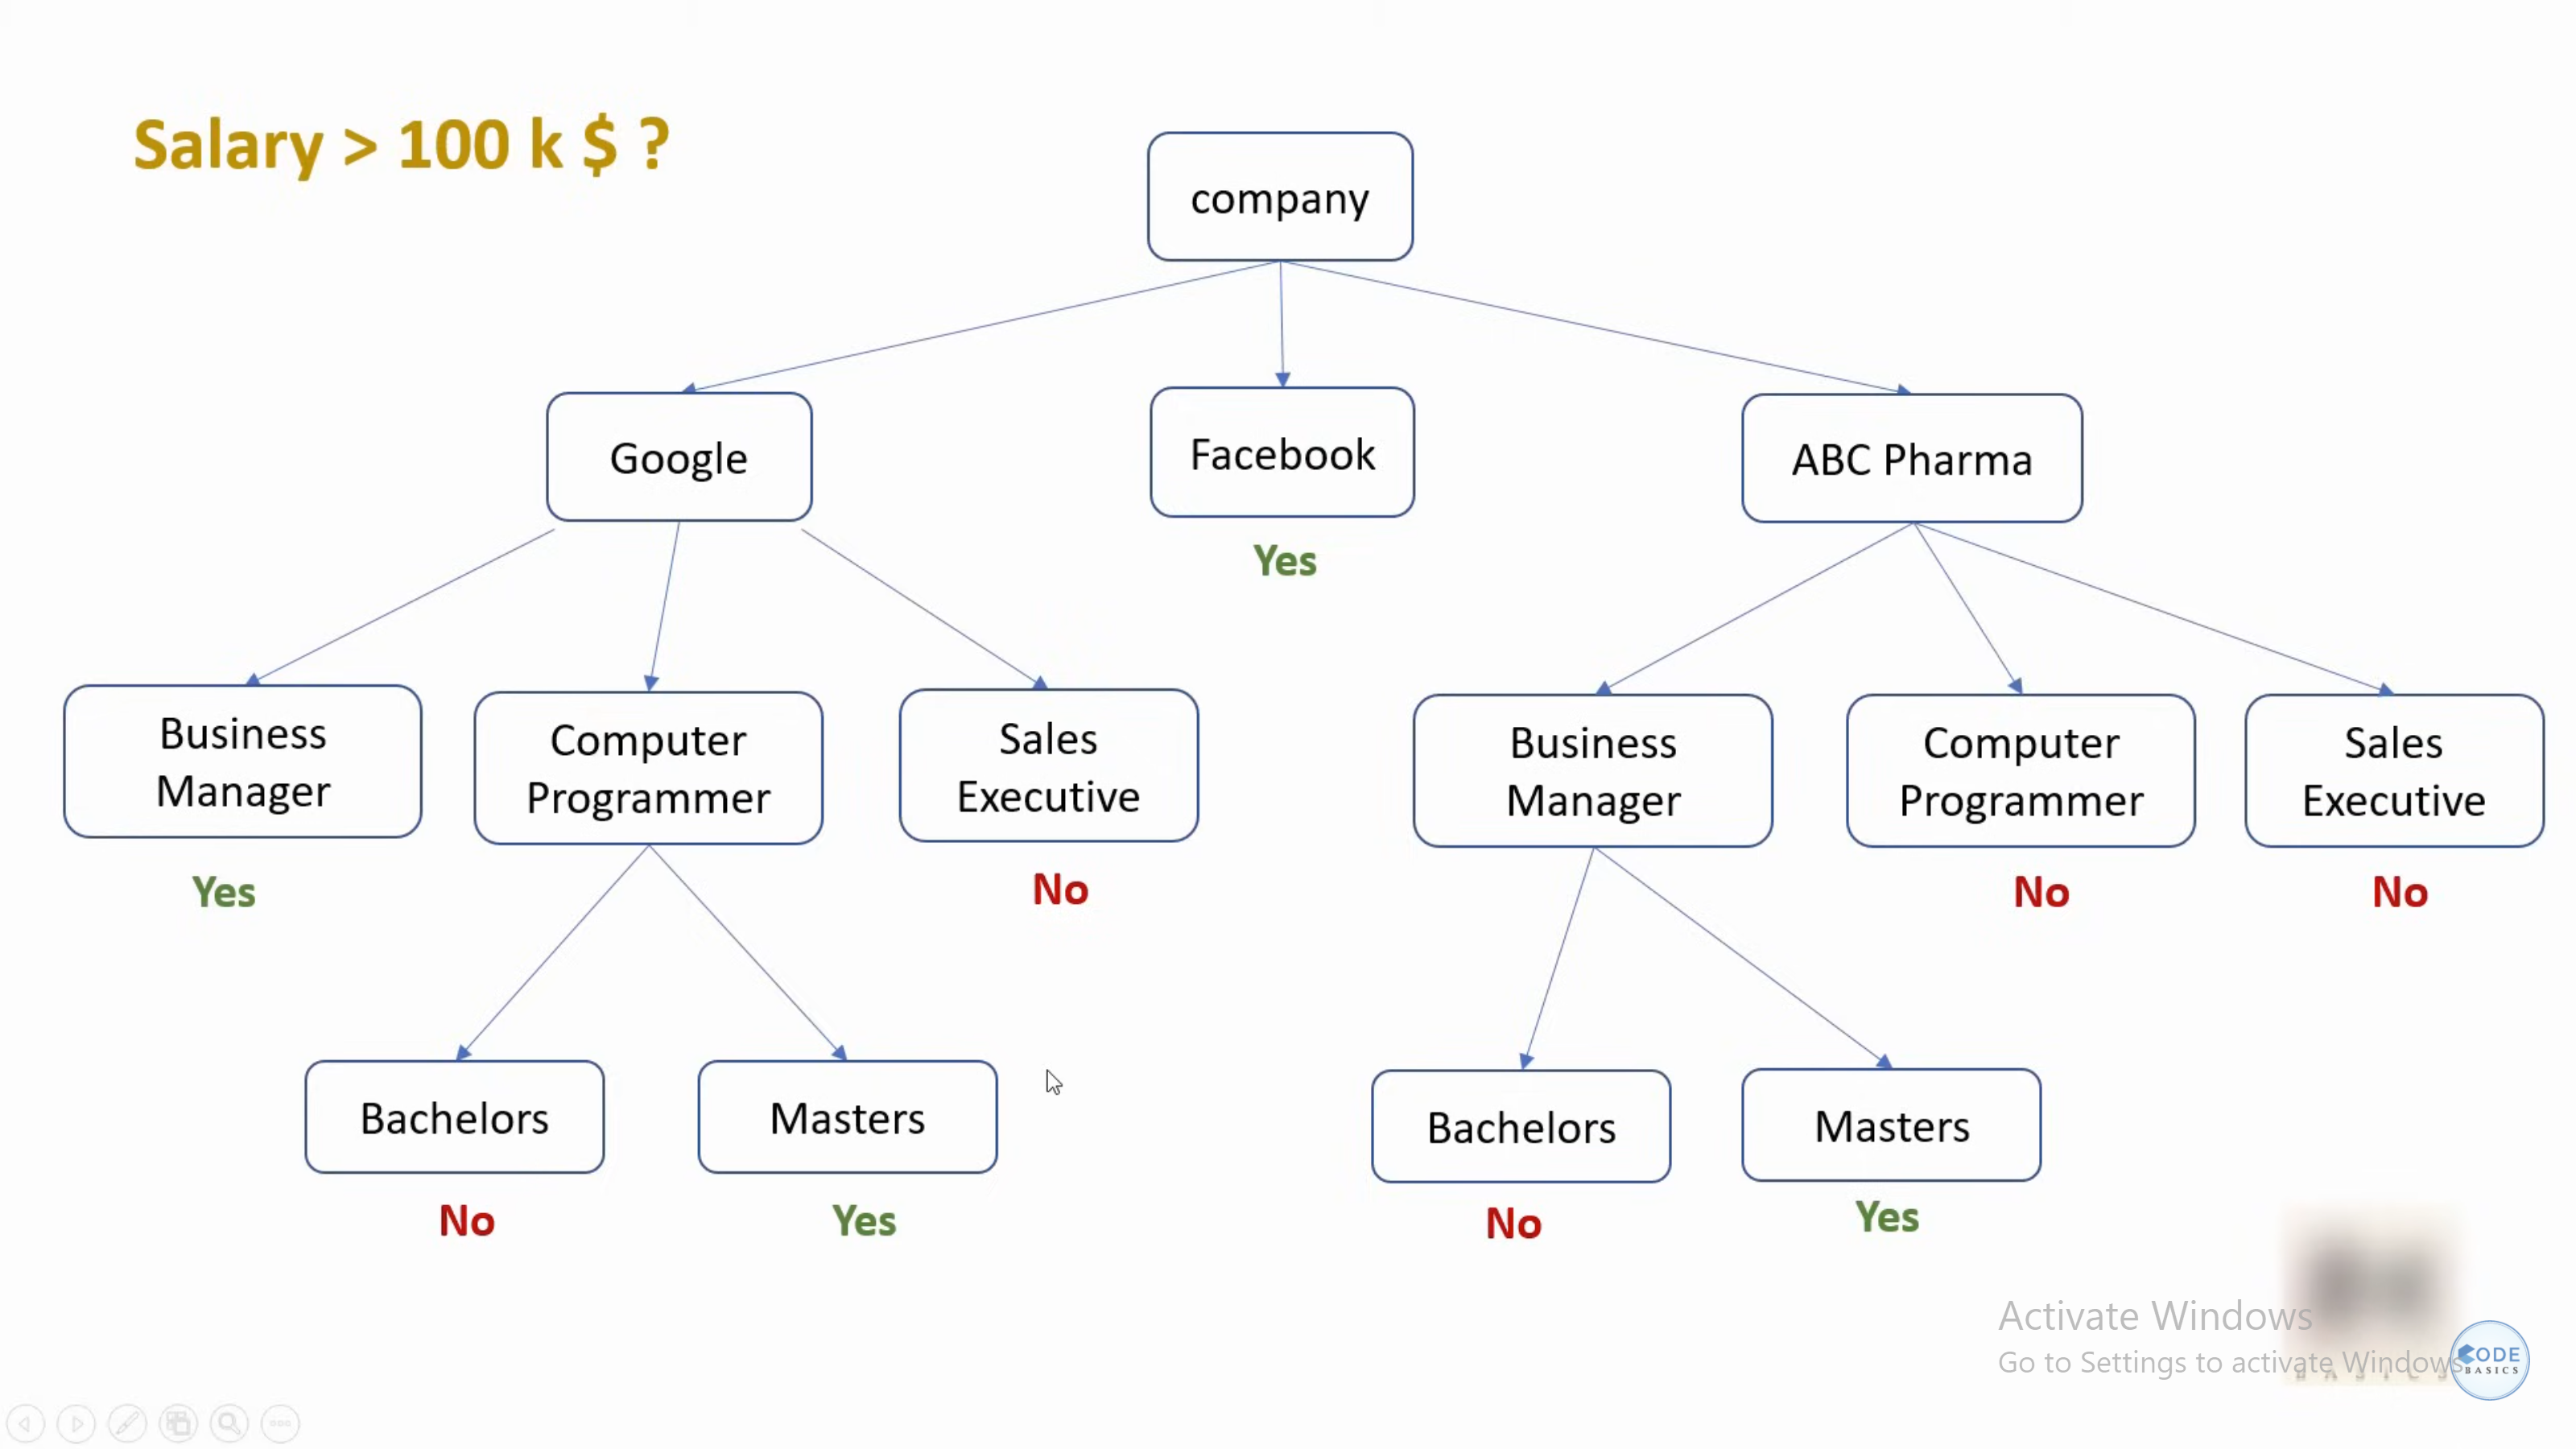

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
inputs = df[["Pclass","Sex","Age","Fare"]]
target = df['Survived']

In [9]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le_sex = LabelEncoder()

In [13]:
inputs["sex_n"] = le_age.fit_transform(inputs["Sex"])
inputs #male = 1, female = 0

<ipython-input-13-46f0d042dac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs["sex_n"] = le_age.fit_transform(inputs["Sex"])


,Pclass,Sex,Age,Fare,age_n,sex_n
0,3,male,22.0,7.2500,28,1
1,1,female,38.0,71.2833,51,0
2,3,female,26.0,7.9250,34,0
3,1,female,35.0,53.1000,47,0
4,3,male,35.0,8.0500,47,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,35,1
887,1,female,19.0,30.0000,24,0
888,3,female,NaN,23.4500,88,0
889,1,male,26.0,30.0000,34,1


In [14]:
inputs.drop("Sex", axis=1, inplace=True)
inputs

<ipython-input-14-59e43662ec0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs.drop("Sex", axis=1, inplace=True)


,Pclass,Age,Fare,age_n,sex_n
0,3,22.0,7.2500,28,1
1,1,38.0,71.2833,51,0
2,3,26.0,7.9250,34,0
3,1,35.0,53.1000,47,0
4,3,35.0,8.0500,47,1
...,...,...,...,...,...
886,2,27.0,13.0000,35,1
887,1,19.0,30.0000,24,0
888,3,NaN,23.4500,88,0
889,1,26.0,30.0000,34,1


In [17]:
inputs["Age"].isnull().sum() # ADA USIA KOSONG SEBANYAK 177 ORANG

177

In [22]:
mean_age = inputs["Age"].mean()
mean_age

29.69911764705882

In [24]:
inputs["Age"] = inputs["Age"].fillna(30)
inputs

<ipython-input-24-24c52c0df87b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs["Age"] = inputs["Age"].fillna(30)


,Pclass,Age,Fare,age_n,sex_n
0,3,22.000000,7.2500,28,1
1,1,38.000000,71.2833,51,0
2,3,26.000000,7.9250,34,0
3,1,35.000000,53.1000,47,0
4,3,35.000000,8.0500,47,1
...,...,...,...,...,...
886,2,27.000000,13.0000,35,1
887,1,19.000000,30.0000,24,0
888,3,29.699118,23.4500,88,0
889,1,26.000000,30.0000,34,1


In [25]:
# prompt: import split test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)


In [26]:
X_train.shape

(712, 5)

In [27]:
from sklearn import tree

In [28]:
model = tree.DecisionTreeClassifier()

In [29]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0])

In [32]:
model.score(X_test, y_test)


0.7877094972067039